source:  
[ゼロから作るDeep Learning ―― Pythonで学ぶディープラーニングの理論と実装](https://www.oreilly.co.jp/books/9784873117584/)  
　斎藤 康毅　著  
　2016年09月 発行  
　ISBN978-4-87311-758-4 
  
other source:  
[誤差逆伝播法をはじめからていねいに](https://qiita.com/43x2/items/50b55623c890564f1893)  

---
## ４章　ニューラルネットワークの学習

損失関数の例  
　$y$ を教師データ、 $\hat{y}$ を出力データ（推定値またはクラスのラベル）とする

#### 二乗和誤差 (mean squared error)
\begin{align*}
E = \frac{1}{2}\sum_{k}(\hat{y}_{k}-y_{k})^2
\end{align*}

#### 交差エントロピー誤差 (cross entropy error)
\begin{align*}
E = -\sum_{k}y_{k}\log_{e}\hat{y}_{k}
\end{align*}

ただし $y_{k}$ は正解ラベルであり、正解となるインデックスのみ１であるようなone-hot表現とする。

#### 勾配法
パラメータを更新する手法のひとつとして、勾配法がある。    
勾配降下法により最小値を求めるステップは、学習率を $\alpha$ として次のように表される。  

\begin{align*}
x_{i+1} = x_{i} - \alpha \frac{\partial f}{\partial x_{i}}
\end{align*}

xがベクトルであるときは

\begin{align*}
X_{i+1} &= X_{i} - \alpha \frac{\partial f}{\partial X_{i}} \\
&= X_{i} - \alpha \left[ \begin{array} \\
\frac{\partial f(x_{1,i})}{\partial x_{1,i}} \\
\frac{\partial f(x_{2,i})}{\partial x_{2,i}} \\
\vdots \\
\frac{\partial f(x_{n,i})}{\partial x_{n,i}}
\end{array} \right]
\end{align*}


---

勾配降下法を用いて $ f(x) = x_{0}^{2} + x_{1}^{2} $ の最小値を求める。

step = 30, x = [ 1.3637108   1.09096864]
step = 60, x = [ 0.74388286  0.59510629]
step = 90, x = [ 0.40577643  0.32462115]
step = 120, x = [ 0.22134468  0.17707575]
step = 150, x = [ 0.12074005  0.09659204]
step = 180, x = [ 0.06586181  0.05268944]
step = 210, x = [ 0.03592658  0.02874127]
step = 240, x = [ 0.01959739  0.01567791]
step = 270, x = [ 0.01069007  0.00855205]
step = 300, x = [ 0.00583126  0.00466501]
finished. x = [ 0.00583126  0.00466501]


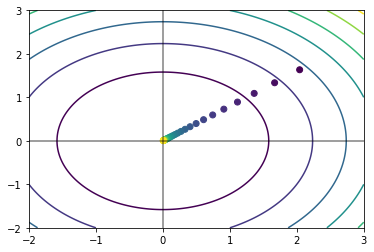

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

def numerical_gradient(f,x):
    h = 1e-6
    grad = np.zeros_like(x)
    for i in range(x.size):
        temp_x_a = copy.deepcopy(x)
        temp_x_b = copy.deepcopy(x)
        temp_x_a[i] = x[i]+h
        temp_x_b[i] = x[i]-h
        grad[i] = (f(temp_x_a) - f(temp_x_b))/ (2*h)
        
    return grad

def gradient_m(f,x,lr):
    next_x = x - lr * numerical_gradient(f,x)
    return next_x

def f2(x):
    #return sum(list(map(lambda x: x**2, x)))
    return np.sum(np.power(x,2))

def gradient_descent(f, x, lr=0.01, step_num=100, record_step=10, print_step=10):
    r = []
    for i in range(step_num):
        x = gradient_m(f2,x,lr)
        if (i+1)%record_step==0:
            r.append(x)
        if ((i+1)*print_step)%step_num==0:
            print("step = {0}, x = {1}".format(i+1, x))
    print("finished. x = {0}".format(x))
    return x,r

def draw_move(r, xmin=-2, xmax=3, ymin=-2, ymax=3, record_step=10):
    r = np.array(r)
    t = np.array(range(1, (int(step_num/record_step))+1))
    x0, x1 = r[:,0], r[:,1]
    plt.scatter(x0,x1,c=t,)
    
    xc = np.linspace(xmin,xmax,400)
    yc = np.linspace(ymin,ymax,400)
    X,Y = np.meshgrid(xc,yc)
    Z = np.power(X,2) + np.power(Y,2)
    plt.contour(X,Y,Z)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.hlines(0,xmin,xmax, alpha=.5)
    plt.vlines(0,ymin,ymax, alpha=.5)
    plt.show()

x = np.array([2.5,2.0])
step_num =  300
xn,record = gradient_descent(f2, x, lr=0.01, step_num=step_num)
draw_move(record)

---
## 5章　誤差逆伝播法

例題：  
　スーパーで１個１００円のりんごを２個買った時の支払金額を求める計算グラフ  

\begin{align*}
\text{apple} \xrightarrow{100} (\times 2) \xrightarrow{200} (\times 1.1) \xrightarrow{220} \text{cost}  
\end{align*}

商品の単価、個数、税率(10%)を分けて表記する。  
りんごを２個、みかんを３個買った時、

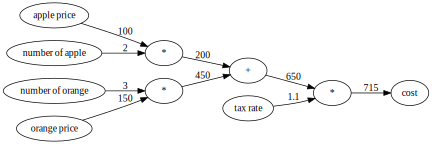

In [2]:
from graphviz import Digraph

dot1 = Digraph()
dot1.graph_attr['rankdir']="LR"
dot1.graph_attr['size']="6,10"

dot1.node("ap", "apple price")
dot1.node("an", "number of apple")
dot1.node('times1-1', '*')
dot1.edge('ap', 'times1-1', label="100")
dot1.edge('an', 'times1-1', label="2")
dot1.node('sum','+')
dot1.edge('times1-1','sum',label='200')

dot1.node("op", "orange price")
dot1.node("on", "number of orange")
dot1.node('times1-2', '*')
dot1.edge('op', 'times1-2', label="150")
dot1.edge('on', 'times1-2', label="3")
dot1.edge('times1-2', 'sum', label="450")

dot1.node("tx", "tax rate")
dot1.node('times2', '*')
dot1.edge('sum', 'times2', label="650")
dot1.edge('tx', 'times2', label="1.1")
dot1.node('c', 'cost')
dot1.edge('times2', 'c', label='715')
dot1

計算グラフを用いた逆伝播を記す。  
$y=f(x)$ に対して、計算グラフと逆伝播は次の通り。  
　（必要に応じて $\frac{\mathrm{d} y}{\mathrm{d} x}$ を $\frac{\partial y}{\partial x}$ に読み替えてください）

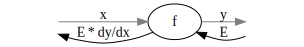

In [3]:
from graphviz import Digraph

dot2 = Digraph()
dot2.graph_attr['rankdir']="LR"
dot2.graph_attr['size']="6,10"

dot2.node('s1',"",shape="plaintext")
dot2.node('f', 'f')
dot2.node('s2','',shape='plaintext')
dot2.edge('s1','f',label='x',color='gray')
dot2.edge('f','s2',label='y',color='gray')
dot2.edge('f','s1',label='E * dy/dx') # sorry, I can't use tex in graphviz. Please think d as partial d.
dot2.edge('s2','f',label='E')
dot2

#### 連鎖率
\begin{align*}
z &= t^{2} \\
t &= x+y
\end{align*}

について、連鎖率より

\begin{align*}
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} 
\end{align*}

よって、

\begin{align*}
\frac{\partial z}{\partial t} = 2t ,\, \frac{\partial t}{\partial x} = 1
\end{align*}

から

\begin{align*}
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} =2t \cdot 1 = 2(x+y)
\end{align*}

のように計算できる。これを計算グラフで表示すると

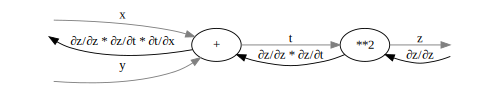

In [4]:
from graphviz import Digraph

dot3 = Digraph()
dot3.graph_attr['rankdir']="LR"
dot3.graph_attr['size']="7,7"

dot3.node('s1',"",shape="plaintext")
dot3.node('s2','',shape='plaintext')
dot3.node('sum', '+')
dot3.edge('s1','sum',label='x',color='gray')
dot3.edge('s2','sum',label='y',color='gray')
dot3.edge('sum','s1',label='∂z/∂z * ∂z/∂t * ∂t/∂x')

dot3.node('power', '**2')
dot3.edge('sum','power',label='t', color='gray')
dot3.edge('power','sum',label='∂z/∂z * ∂z/∂t')
dot3.node('s3', '', shape='plaintext')
dot3.edge('power','s3',label='z', color='gray')
dot3.edge('s3','power',label='∂z/∂z')
dot3

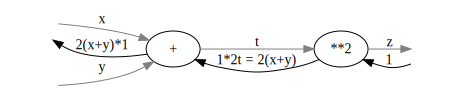

In [5]:
from graphviz import Digraph

dot4 = Digraph()
dot4.graph_attr['rankdir']="LR"
dot4.graph_attr['size']="8,8"

dot4.node('s1',"",shape="plaintext")
dot4.node('s2','',shape='plaintext')
dot4.node('sum', '+')
dot4.edge('s1','sum',label='x',color='gray')
dot4.edge('s2','sum',label='y',color='gray')
dot4.edge('sum','s1',label='2(x+y)*1') 

dot4.node('power', '**2')
dot4.edge('sum','power',label='t', color='gray')
dot4.edge('power','sum',label='1*2t = 2(x+y)')
dot4.node('s3', '', shape='plaintext')
dot4.edge('power','s3',label='z', color='gray')
dot4.edge('s3','power',label='1')
dot4

### 逆伝播

#### 加算ノードの場合
　最終的な出力を $L$ とする。

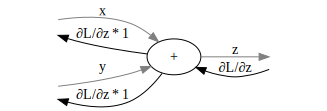

In [6]:
from graphviz import Digraph
dot5 = Digraph()
dot5.graph_attr['rankdir']="LR"
dot5.graph_attr['size']="8,6"
dot5.node('i1',"",shape="plaintext")
dot5.node('i2','',shape='plaintext')
dot5.node('sum', '+')
dot5.edge('i1','sum',label='x',color='gray')
dot5.edge('i2','sum',label='y',color='gray')
dot5.edge('sum','i1',label='∂L/∂z * 1')
dot5.edge('sum','i2',label='∂L/∂z * 1')
dot5.node('o1','',shape='plaintext')
dot5.edge('sum','o1',label='z',color='gray')
dot5.edge('o1','sum',label='∂L/∂z')
dot5.body.append('{rank=same; i1; i2;}')
dot5

#### 乗算ノード
　同様にして、

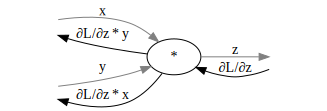

In [7]:
from graphviz import Digraph
dot6 = Digraph()
dot6.graph_attr['rankdir']="LR"
dot6.graph_attr['size']="8,6"
dot6.node('i1',"",shape="plaintext")
dot6.node('i2','',shape='plaintext')
dot6.node('times', '*')
dot6.edge('i1','times',label='x',color='gray')
dot6.edge('i2','times',label='y',color='gray')
dot6.edge('times','i1',label='∂L/∂z * y')
dot6.edge('times','i2',label='∂L/∂z * x')
dot6.node('o1','',shape='plaintext')
dot6.edge('times','o1',label='z',color='gray')
dot6.edge('o1','times',label='∂L/∂z')
dot6.body.append('{rank=same; i1; i2;}')
dot6

これらを用いて例題の逆伝播を行う。出力を1とするとき、

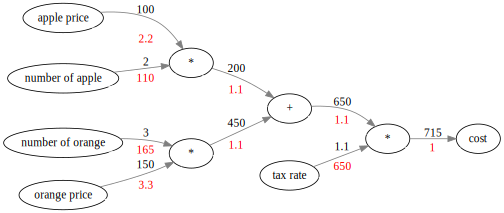

In [8]:
from graphviz import Digraph

dot7 = Digraph()
dot7.graph_attr['rankdir']='LR'
dot7.graph_attr['size']="7,8"

dot7.node("ap", "apple price")
dot7.node("an", "number of apple")
dot7.node('times1_1', '*')
dot7.node('sum','+')
dot7.edge('ap', 'times1_1', label="100",color='gray')
dot7.edge('an', 'times1_1', label="2",color='gray')
dot7.edge('times1_1','sum',label='200',color='gray')
dot7.edge('times1_1','ap', label="2.2", color='white', fontcolor='red')
dot7.edge('times1_1','an', label="110", color='white', fontcolor='red')
dot7.edge('sum','times1_1',label="1.1", color='white', fontcolor='red')

dot7.node("op", "orange price")
dot7.node("on", "number of orange")
dot7.node('times1_2', '*')
dot7.edge('op', 'times1_2', label="150",color='gray')
dot7.edge('on', 'times1_2', label="3",color='gray')
dot7.edge('times1_2', 'sum', label="450",color='gray')
dot7.edge('times1_2','op', label="3.3", color='white', fontcolor='red')
dot7.edge( 'times1_2','on', label="165", color='white', fontcolor='red')
dot7.edge('sum','times1_2', label="1.1", color='white', fontcolor='red')

dot7.node("tx", "tax rate")
dot7.node('times2', '*')
dot7.node('c', 'cost')
dot7.edge('sum', 'times2', label="650",color='gray')
dot7.edge('tx', 'times2', label="1.1",color='gray')
dot7.edge('times2', 'c', label='715',color='gray')
dot7.edge('times2','sum', label="1.1", color='white', fontcolor='red')
dot7.edge('times2','tx', label="650", color='white', fontcolor='red')
dot7.edge('c', 'times2', label="1", color='white', fontcolor='red')

dot7.body.append('{rank=same; ap; an; op; on;}')
dot7.body.append('{rank=same; times1_1; times1_2;}')
dot7.body.append('{rank=same; sum; tx;}')
dot7

---
#### レイヤの実装
誤差逆伝播法が使用できる形で、各ノードをレイヤとして実装する。

In [9]:
# 乗算レイヤ
class MulLayer(object):
    def __init__(self):
        self.x, self.y = None, None
        
    def forward(self, x, y):
        self.x, self.y = x, y
        out = x*y
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy
    
# 加算レイヤ
class AddLayer(object):
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [10]:
# 例題の実装
apple_price, apple_num = 100, 2
orange_price, orange_num = 150, 3
tax_rate = 1.1

mul_1_1 = MulLayer()
mul_1_2 = MulLayer()
add_2 = AddLayer()
mul_3 = MulLayer()

# forward
apple_sum = mul_1_1.forward(apple_price, apple_num)
orange_sum = mul_1_2.forward(orange_price, orange_num)
fruit_sum = add_2.forward(apple_sum, orange_sum)
cost = mul_3.forward(fruit_sum, tax_rate)

# backward
dprice = 1
dfruit_sum, dtax_rate = mul_3.backward(dprice)
dapple_sum, dorange_sum = add_2.backward(dfruit_sum)
dorange_price, dorange_num = mul_1_2.backward(dorange_sum)
dapple_price, dapple_num = mul_1_1.backward(dapple_sum)

print("cost={0} \ndapple_price={1}, dapple_num={2} \ndorange_price={3}, dorange_num={4} \ndtax_rate={5}".format(cost, dapple_price, dapple_num, dorange_price, dorange_num, dtax_rate))


cost=715.0000000000001 
dapple_price=2.2, dapple_num=110.00000000000001 
dorange_price=3.3000000000000003, dorange_num=165.0 
dtax_rate=650


#### 活性化関数レイヤの実装

In [11]:
import numpy as np
from copy import deepcopy

# ReLUレイヤ
class ReLU(object):
    def __init__(self):
        self.mask = None
    
    def forwrad(self, x):
        self.mask = np.where(x <= 0, 0, 1)
        out = x.deepcopy() * self.mask
        return out
    
    def backward(self, dout):
        dx = dout*self.mask

シグモイド関数の計算グラフと逆伝播は次の通り。

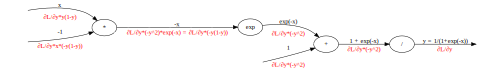

In [12]:
from graphviz import Digraph

dot8 = Digraph()
dot8.graph_attr['rankdir']='LR'
dot8.graph_attr['size']="7,8"

dot8.node('s1', '', shape='plaintext')
dot8.node('s2', '', shape='plaintext')
dot8.node('mul', '*')
dot8.edge('s1', 'mul', label='x')
dot8.edge('mul','s1', label='∂L/∂y*y(1-y)', color='white', fontcolor='red')
dot8.edge('s2', 'mul', label='-1')
dot8.edge('mul','s2', label='∂L/∂y*x*(-y(1-y))', color='white', fontcolor='red')
dot8.node('exp', 'exp')
dot8.edge('mul', 'exp', label='-x')
dot8.edge('exp','mul', label='∂L/∂y*(-y^2)*exp(-x) = ∂L/∂y*(-y(1-y))', color='white', fontcolor='red')
dot8.node('s3', '', shape='plaintext')
dot8.node('sum', '+')
dot8.edge('exp', 'sum', label='exp(-x)')
dot8.edge('sum','exp', label='∂L/∂y*(-y^2)', color='white', fontcolor='red')
dot8.edge('s3', 'sum', label='1')
dot8.edge('sum','s3', label='∂L/∂y*(-y^2)', color='white', fontcolor='red')
dot8.node('div', '/')
dot8.edge('sum', 'div', label='1 + exp(-x)')
dot8.edge('div','sum', label='∂L/∂y*(-y^2)', color='white', fontcolor='red')
dot8.node('s4', '', shape='plaintext')
dot8.edge('div', 's4', label='y = 1/(1+exp(-x))')
dot8.edge('s4','div', label='∂L/∂y', color='white', fontcolor='red')

dot8.body.append('{rank=same; s1; s2;}')
dot8.body.append('{rank=same; exp; s3;}')
dot8

In [13]:
# sigmoidレイヤ
class Sigmoid(object):
    def __init__(self):
        self.out = None
        
    def forward(self):
        self.out = 1 / (1+np.exp(-x))
        return self.out
    
    def backward(self, dout):
        dx = dout * self.out * (1. - self.out)
        return dx